## Deploy churn prediction model
In this notebook we will demonstrate how to get the model generated [here]() to deploy it. We need to follow these steps:

- Get an already trained model
- Instantiate an Azure ML Workspace
- Build an image with the best model packaged
- Deploy the model to ACI (Azure Container Instance)
- Deploy the model to AKS (Azure Kubernetes Services)

## First lets get the model
Return the best model from `churn-prediction` experiment. We will use the same notebook **model-churn-prediction** and return the `model_uri`.

Out[3]:

,CodigoCliente,Titulo,PrimeiroNome,UltimoNome,Idade,Sexo,Endereco,Cidade,UF,UFCompleto,CEP,Pais,PaisCompleto,Email,RendaMensal,PercentualUtilizacaoLimite,QtdTransacoesNegadas,AnosDeRelacionamentoBanco,JaUsouChequeEspecial,QtdEmprestimos,NumeroAtendimentos,TMA,IndiceSatisfacao,Saldo,CLTV,CanalPref,Churn,UF_cleaned,mail_domain
0,1,Sra.,Fernanda,Camargo,32,Feminino,"Rua Paulo Suplicy, 376",São Paulo,SP,São Paulo,54210-520,BR,Brazil,fecamargo@gmail.com,8000,0.92,5,3,0,1,7,2,4,55229,65,Push,0,SP,gmail.com
1,2,Sr.,Paulo,Dias,63,Masculino,Estrada Transcastanhal 456,Castanhal,PA,Pará,68742-200,BR,Brazil,PauloPintoDias@gustr.com,4672,0.84,0,2,1,0,15,87,3,9936,66,Email,1,PA,gustr.com
2,3,Sr.,Enzo,Araujo,64,Masculino,Rua Joana D'Arc Gonçalves 576,Araxá,MG,Minas Gerais,38180-228,BR,Brazil,EnzoDiasAraujo@einrot.com,9751,0.20,14,19,0,0,1,5,4,769,30,SMS,1,MG,einrot.com
3,4,Sr.,Martim,Souza,59,Masculino,Rua Paulo Suplicy 376,São Paulo,SP,São Paulo,04637-010,BR,Brazil,MartimCastroSouza@superrito.com,7405,0.39,10,9,1,0,2,2,4,1246,76,Email,1,SP,superrito.com
4,5,Sr.,Gabriel,Barros,21,Masculino,Rua M 879,Valparaíso de Goiás,GO,Goiás,72870-040,BR,Brazil,GabrielCastroBarros@fleckens.hu,5102,0.50,7,16,0,0,3,4,4,2732,90,Email,0,GO,fleckens.hu


Out[4]:

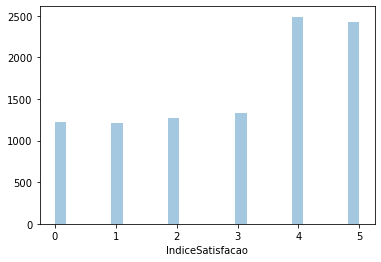

<matplotlib.axes._subplots.AxesSubplot at 0x7ff98bfc7a60>

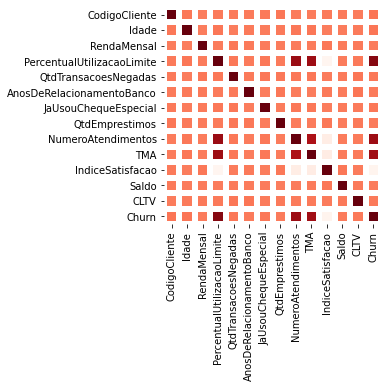

Out[6]: CodigoCliente False
Titulo False
PrimeiroNome False
UltimoNome False
Idade False
Sexo False
Endereco False
Cidade False
UF False
UFCompleto False
CEP False
Pais False
PaisCompleto False
Email False
RendaMensal False
PercentualUtilizacaoLimite False
QtdTransacoesNegadas False
AnosDeRelacionamentoBanco False
JaUsouChequeEspecial False
QtdEmprestimos False
NumeroAtendimentos False
TMA False
IndiceSatisfacao False
Saldo False
CLTV False
CanalPref False
Churn False
UF_cleaned False
mail_domain False
dtype: bool

Out[8]:

,CodigoCliente,Titulo,PrimeiroNome,UltimoNome,Idade,Sexo,Endereco,Cidade,UF,UFCompleto,CEP,Pais,PaisCompleto,Email,RendaMensal,PercentualUtilizacaoLimite,QtdTransacoesNegadas,AnosDeRelacionamentoBanco,JaUsouChequeEspecial,QtdEmprestimos,NumeroAtendimentos,TMA,IndiceSatisfacao,Saldo,CLTV,CanalPref,Churn,UF_cleaned,mail_domain
3888,3940,Sr.,Rodrigo,Souza,25,Masculino,Praça Padre Miguel Rua 459,São Paulo,SP,São Paulo,04149-060,BR,Brazil,RodrigoBarbosaSouza@rhyta.com,8104,0.93,0,11,0,1,17,179,2,6650,68,SMS,1,SP,rhyta.com


Out[10]: RandomForestClassifier(n_estimators=2,
 random_state=RandomState(MT19937) at 0x7FF98A80D540)

Out[13]:

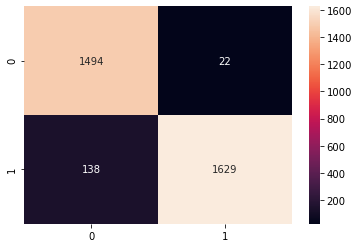

<matplotlib.axes._subplots.AxesSubplot at 0x7ff98a73fdf0>

Results: RandomForestClassifier 
Precisão: 0.99 
Recall: 0.92 
AUC: 0.95 
Acurácia: 0.95

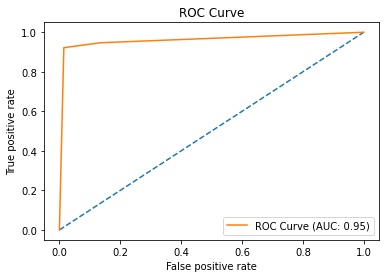

Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr' link for a task to view trial logs.
 0%| | 0/20 [00:00<?, ?trial/s, best loss=?] 10%|█ | 2/20 [00:10<01:38, 5.45s/trial, best loss: -0.9299050087129475] 25%|██▌ | 5/20 [00:12<00:59, 3.97s/trial, best loss: -0.9523830322252137] 30%|███ | 6/20 [00:13<00:45, 3.23s/trial, best loss: -0.9536554436137155] 40%|████ | 8/20 [00:15<00:29, 2.49s/trial, best loss: -0.9611943457673889] 45%|████▌ | 9/20 [00:17<00:25, 2.35s/trial, best loss: -0.9611943457673889] 55%|█████▌ | 11/20 [00:18<00:16, 1.79s/trial, best loss: -0.9611943457673889] 60%|██████ | 12/20 [00:20<00:14, 1.86s/trial, best loss: -0.9611943457673889] 70%|███████ | 14/20 [00:23<00:10, 1.76s/trial, best loss: -0.9611943457673889] 75%|███████▌ | 15/20 [00:25<00:09, 1.83s/trial, best loss: -0.9611943457673889] 85%|████████▌ | 17/20 [00:26<00:04, 1.43s/trial, best loss: -0.9611943457673889] 90%|█████████ | 18/20 [00:28<00:02, 1.45s/trial, best loss: -0.9618071265490307]100%|██████████| 20/20 [00:29<00:00, 1.17s/trial, best loss: -0.9618071265490307]100%|██████████| 20/20 [00:29<00:00, 1.45s/trial, best loss: -0.9618071265490307]
Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.

AUC of Best Run: 0.96
model_uri: runs:/0c295d3fbbff41399f90081484f3d770/model

In [ ]:
%run ../model-churn-prediction

And load the `xgboost` using the `model_uri` returned from MLFlow tracking.

In [ ]:
import mlflow

model = mlflow.xgboost.load_model(model_uri)

## Get Azure Machine Learning Workspace
We will use Azure Machine Learning to deliver the API `endpoints` that will consume the Machine Learning models. To be able to interact with Azure ML we will use [Azure Machine Learning Python SDK](https://docs.microsoft.com/en-us/python/api/overview/azure/ml/?view=azure-ml-py), with it its possible to create new workspaces (or use existing ones) to facilitate the deployment process.

Its required to fill the variables `WORKSPACE_NAME`, `WORKSPACE_LOCATION`, `RESOURCE_GROUP` and `SUBSCRIPTION_ID` with your subscription data.

As default will be required the `Interactive Login` auth. For production scenarios an app registration with `Service Principal` is required. In the [documentation] (https://docs.microsoft.com/en-us/azure/machine-learning/how-to-setup-authentication#set-up-service-principal-authentication) we have more details about the different kind of authentications.

First install the [`azureml-sdk`](https://pypi.org/project/azureml-sdk/)

In [ ]:
!pip install azureml-sdk

Collecting azureml-sdk
 Downloading azureml_sdk-1.32.0-py3-none-any.whl (4.4 kB)
Collecting azureml-pipeline~=1.32.0
 Downloading azureml_pipeline-1.32.0-py3-none-any.whl (3.7 kB)
Collecting azureml-dataset-runtime[fuse]~=1.32.0
 Downloading azureml_dataset_runtime-1.32.0-py3-none-any.whl (3.5 kB)
Collecting azureml-core~=1.32.0
 Downloading azureml_core-1.32.0-py3-none-any.whl (2.2 MB)
▏ | 10 kB 33.7 MB/s eta 0:00:01 |▎ | 20 kB 30.1 MB/s eta 0:00:01 |▌ | 30 kB 17.2 MB/s eta 0:00:01 |▋ | 40 kB 12.5 MB/s eta 0:00:01 |▊ | 51 kB 12.1 MB/s eta 0:00:01 |█ | 61 kB 14.1 MB/s eta 0:00:01 |█ | 71 kB 12.2 MB/s eta 0:00:01 |█▏ | 81 kB 13.5 MB/s eta 0:00:01 |█▍ | 92 kB 12.7 MB/s eta 0:00:01 |█▌ | 102 kB 13.4 MB/s eta 0:00:01 |█▋ | 112 kB 13.4 MB/s eta 0:00:01 |█▉ | 122 kB 13.4 MB/s eta 0:00:01 |██ | 133 kB 13.4 MB/s eta 0:00:01 |██ | 143 kB 13.4 MB/s eta 0:00:01 |██▎ | 153 kB 13.4 MB/s eta 0:00:01 |██▍ | 163 kB 13.4 MB/s eta 0:00:01 |██▌ | 174 kB 13.4 MB/s eta 0:00:01 |██▊ | 184 kB 13.4 MB/s eta 0:00:01 |██▉ | 194 kB 13.4 MB/s eta 0:00:01 |███ | 204 kB 13.4 MB/s eta 0:00:01 |███▏ | 215 kB 13.4 MB/s eta 0:00:01 |███▎ | 225 kB 13.4 MB/s eta 0:00:01 |███▍ | 235 kB 13.4 MB/s eta 0:00:01 |███▋ | 245 kB 13.4 MB/s eta 0:00:01 |███▊ | 256 kB 13.4 MB/s eta 0:00:01 |███▉ | 266 kB 13.4 MB/s eta 0:00:01 |████ | 276 kB 13.4 MB/s eta 0:00:01 |████▏ | 286 kB 13.4 MB/s eta 0:00:01 |████▎ | 296 kB 13.4 MB/s eta 0:00:01 |████▌ | 307 kB 13.4 MB/s eta 0:00:01 |████▋ | 317 kB 13.4 MB/s eta 0:00:01 |████▊ | 327 kB 13.4 MB/s eta 0:00:01 |█████ | 337 kB 13.4 MB/s eta 0:00:01 |█████ | 348 kB 13.4 MB/s eta 0:00:01 |█████▏ | 358 kB 13.4 MB/s eta 0:00:01 |█████▍ | 368 kB 13.4 MB/s eta 0:00:01 |█████▌ | 378 kB 13.4 MB/s eta 0:00:01 |█████▋ | 389 kB 13.4 MB/s eta 0:00:01 |█████▉ | 399 kB 13.4 MB/s eta 0:00:01 |██████ | 409 kB 13.4 MB/s eta 0:00:01 |██████ | 419 kB 13.4 MB/s eta 0:00:01 |██████▎ | 430 kB 13.4 MB/s eta 0:00:01 |██████▍ | 440 kB 13.4 MB/s eta 0:00:01 |██████▌ | 450 kB 13.4 MB/s eta 0:00:01 |██████▊ | 460 kB 13.4 MB/s eta 0:00:01 |██████▉ | 471 kB 13.4 MB/s eta 0:00:01 |███████ | 481 kB 13.4 MB/s eta 0:00:01 |███████▏ | 491 kB 13.4 MB/s eta 0:00:01 |███████▎ | 501 kB 13.4 MB/s eta 0:00:01 |███████▍ | 512 kB 13.4 MB/s eta 0:00:01 |███████▋ | 522 kB 13.4 MB/s eta 0:00:01 |███████▊ | 532 kB 13.4 MB/s eta 0:00:01 |███████▉ | 542 kB 13.4 MB/s eta 0:00:01 |████████ | 552 kB 13.4 MB/s eta 0:00:01 |████████▏ | 563 kB 13.4 MB/s eta 0:00:01 |████████▎ | 573 kB 13.4 MB/s eta 0:00:01 |████████▌ | 583 kB 13.4 MB/s eta 0:00:01 |████████▋ | 593 kB 13.4 MB/s eta 0:00:01 |████████▊ | 604 kB 13.4 MB/s eta 0:00:01 |█████████ | 614 kB 13.4 MB/s eta 0:00:01 |█████████ | 624 kB 13.4 MB/s eta 0:00:01 |█████████▏ | 634 kB 13.4 MB/s eta 0:00:01 |█████████▍ | 645 kB 13.4 MB/s eta 0:00:01 |█████████▌ | 655 kB 13.4 MB/s eta 0:00:01 |█████████▋ | 665 kB 13.4 MB/s eta 0:00:01 |█████████▉ | 675 kB 13.4 MB/s eta 0:00:01 |██████████ | 686 kB 13.4 MB/s eta 0:00:01 |██████████ | 696 kB 13.4 MB/s eta 0:00:01 |██████████▎ | 706 kB 13.4 MB/s eta 0:00:01 |██████████▍ | 716 kB 13.4 MB/s eta 0:00:01 |██████████▌ | 727 kB 13.4 MB/s eta 0:00:01 |██████████▊ | 737 kB 13.4 MB/s eta 0:00:01 |██████████▉ | 747 kB 13.4 MB/s eta 0:00:01 |███████████ | 757 kB 13.4 MB/s eta 0:00:01 |███████████▏ | 768 kB 13.4 MB/s eta 0:00:01 |███████████▎ | 778 kB 13.4 MB/s eta 0:00:01 |███████████▍ | 788 kB 13.4 MB/s eta 0:00:01 |███████████▋ | 798 kB 13.4 MB/s eta 0:00:01 |███████████▊ | 808 kB 13.4 MB/s eta 0:00:01 |███████████▉ | 819 kB 13.4 MB/s eta 0:00:01 |████████████ | 829 kB 13.4 MB/s eta 0:00:01 |████████████▏ | 839 kB 13.4 MB/s eta 0:00:01 |████████████▎ | 849 kB 13.4 MB/s eta 0:00:01 |████████████▌ | 860 kB 13.4 MB/s eta 0:00:01 |████████████▋ | 870 kB 13.4 MB/s eta 0:00:01 |████████████▊ | 880 kB 13.4 MB/s eta 0:00:01 |█████████████ | 890 kB 13.4 MB/s eta 0:00:01 |█████████████ | 901 kB 13.4 MB/s eta 0:00:01 |███

And now we can use it to instantiate the Azure ML Workspace

In [ ]:
import azureml
from azureml.core import Workspace
import mlflow.azureml

workspace_name = '<YOUR-WORKSPACE-NAME>'
resource_group = '<YOUR-RESOURCE-GROUP>'
subscription_id = '<YOUR-SUBSCRIPTION-ID>'

workspace = Workspace.get(name = workspace_name,
                          resource_group = resource_group,
                          subscription_id = subscription_id)

## Register the model
Now we instantiate the Azure ML Workspace we can register the model. First we will persist it to the dbfs (to be able to pass the path as a parameters to Azure ML Register)

In [ ]:
import shutil
model_path = '/dbfs/models/churn-prediction'

# Delete old files
shutil.rmtree(model_path)

# Persist the XGBoost model
mlflow.xgboost.save_model(model, model_path)

In [ ]:
from azureml.core.model import Model

model_name = 'churn-model'
model_description = 'Modelo de predição de churn utilizando XGBoost'

model_azure = Model.register(model_path = model_path,
                             model_name = model_name,
                             description = model_description,
                             workspace = workspace,
                             tags={'Framework': "XGBoost", 'Tipo': "Classificação"}
                             )

Registering model churn-model

A new model version was generated in the Azure ML Workspace. We can use it to deploy an API with ACI or AKS.

#Deploy
Now with the model registered we can choose between two deployment types: `ACI` (Azure Container Instance) or `AKS` (Azure Kubernetes Service).

For development scenarios it is better to use `ACI` and for production `AKS` will have more options related to scalability and security. Please see more details in this [page](https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/ai/mlops-python).

### Entry script
But before deploy the model, it is important to define an **`entry script`** named score.py. It will be responsible to load the model when the deployed service starts and for receiving data, passing it to the model, and then returning a response as well (see this [link](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-existing-model#define-inference-configuration)).

In [ ]:
%%writefile /dbfs/models/churn-prediction/score.py

from azureml.monitoring import ModelDataCollector

import mlflow
import json
import pandas as pd
import os
import xgboost as xgb
import time

# Called when the deployed service starts
def init():
    global model
    global train_stats
    global inputs_dc
    
    inputs_dc = ModelDataCollector("churn-model", designation="inputs", feature_names= ["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV","churn-prediction"])

    # Get the path where the deployed model can be found.
    model_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), './churn-prediction')
    
    # Load model
    model = mlflow.xgboost.load_model(model_path)

# Handle requests to the service
def run(data):
 
  info = {"payload": data}
  print(json.dumps(info))
  data = pd.read_json(data, orient = 'split')

  # Return the prediction
  prediction = predict(data)  
  
  print ("Prediction created at: " + time.strftime("%H:%M:%S"))
  
  return prediction

def predict(data):
  
  data_xgb = xgb.DMatrix(data)

  prediction = model.predict(data_xgb)
  
  data['churn-prediction'] = prediction
  
  correlations = inputs_dc.collect(data) #this call is saving our input data into Azure Blob  
  print(f'correlations: {correlations}')
  
  return {"churn-prediction": str(prediction[0])}

Overwriting /dbfs/models/churn-prediction/score.py

### Inference config
We must now add some inference configs to be used in the endpoint. We can add required packages and an environment that can be registered in the Azure ML Workspace.

Here we will use the same `conda.yaml` file that is already registered from MLFlow process. We will add the `azureml-defaults` package that can be used in the inference process.

In [ ]:
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies

# Create the environment
env = Environment(name='xgboost_env')

conda_dep = CondaDependencies('/dbfs/models/churn-prediction/conda.yaml')

# Define the packages needed by the model and scripts
conda_dep.add_pip_package("azureml-defaults")
conda_dep.add_pip_package("azureml-monitoring")

# Adds dependencies to PythonSection of myenv
env.python.conda_dependencies=conda_dep

inference_config = InferenceConfig(entry_script="/dbfs/models/churn-prediction/score.py",
                                   environment=env)

Now with the inference config we can proceed with the deployment

## Azure Kubernetes Services (AKS)
For production scenarios it is better to deploy using AKS because we have more benefits about security and scalability.

In this scenario is possible to follow two ways: Creating a new AKS cluster or targeting to an existing one. In this tutorial we will use a existing cluster.

In [ ]:
from azureml.core.webservice import AksWebservice
from azureml.core.compute import AksCompute, ComputeTarget
from azureml.exceptions import ComputeTargetException

endpoint_name = 'api-churn-prod'
aks_name = 'aks-e2e-ds2'

try:
  aks_target = AksCompute(workspace, aks_name)
except ComputeTargetException as error:
  prov_config = AksCompute.provisioning_configuration()
  aks_target = ComputeTarget.create(workspace = workspace, name = aks_name, provisioning_configuration = prov_config)
  aks_target.wait_for_completion(show_output = True)

aks_config = AksWebservice.deploy_configuration(enable_app_insights = True, collect_model_data=True)
aks_service = Model.deploy(workspace=workspace,
                           name=endpoint_name,
                           models=[model_azure],
                           inference_config=inference_config,
                           deployment_config=aks_config,
                           deployment_target=aks_target,
                           overwrite=True)

aks_service.wait_for_deployment(show_output = True)
print(aks_service.state)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-07-28 11:35:19+00:00 Creating Container Registry if not exists.
2021-07-28 11:35:20+00:00 Registering the environment.
2021-07-28 11:35:25+00:00 Use the existing image..
2021-07-28 11:35:29+00:00 Checking the status of deployment api-churn-prod..
2021-07-28 11:36:18+00:00 Checking the status of inference endpoint api-churn-prod.
Succeeded
AKS service creation operation finished, operation "Succeeded"
Healthy

## Call the API (with AKS)

### Make some random requests

In [ ]:
import random
import requests

headers = {
  'Content-Type': 'application/json'
}

prod_service_key = aks_service.get_keys()[0] if len(aks_service.get_keys()) > 0 else None

headers["Authorization"] = "Bearer {service_key}".format(service_key=prod_service_key)

for i in range(50):  
  payload='{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],'
  #print(payload)
  
  payload=payload + '"data":[[{},{},{},{},{},{},{},{},{},{},{},{}]]'.format(random.randint(1, 100),
                                                                             random.randrange(1000.0, 10000.0),
                                                                             random.randrange(0.0, 1.0),
                                                                             random.randrange(0.0, 100.0),
                                                                             random.randrange(1.0, 30.0),
                                                                             random.randrange(0.0, 1.0),
                                                                             random.randrange(0.0, 50.0),
                                                                             random.randint(1, 100),
                                                                             random.randint(1, 5),
                                                                             random.randint(1, 5),
                                                                             random.randint(0, 100000),
                                                                             random.randint(0, 100000))
  
  
  payload=payload + '}'
 
  print(payload)
  response1 = requests.request("POST", aks_service.scoring_uri, headers=headers, data=payload)
  print(response1.text)

{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[24,5935,0,58,5,0,23,71,2,4,21946,89110]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[40,2388,0,29,4,0,10,13,2,5,94000,70847]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[57,2388,0,67,22,0,43,43,1,4,53140,4397]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[15,4920,0,51,12,0,4,75,5,4,80051,35399]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[55,2955,0,63,25,0,10,92,2,4,79745,37671]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[49,1455,0,21,13,0,32,68,3,1,21505,84265]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[65,8564,0,15,25,0,46,67,1,2,7692,18532]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[1,8453,0,77,27,0,30,62,1,5,86926,53659]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[8,8665,0,26,17,0,42,12,1,5,64486,50635]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[16,7882,0,74,7,0,2,20,1,4,68024,39552]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[92,5792,0,22,7,0,0,49,4,3,56348,59723]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[58,6534,0,49,15,0,5,20,1,1,59108,13932]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtendimentos","TMA","IndiceSatisfacao","Saldo","CLTV"],"data":[[89,9016,0,4,6,0,30,32,2,4,38713,17610]]}
{"churn-prediction": "1.0"}
{"columns":["Idade","RendaMensal","PercentualUtilizacaoLimite","QtdTransacoesNegadas","AnosDeRelacionamentoBanco","JaUsouChequeEspecial","QtdEmprestimos","NumeroAtend

## Output Data

The output is saved in Blob storage. To see this output you can access the Azure portal, open you Azure Machine Learning studio and select the storage:

![azure machine learning storage](media\1-storagelocation.PNG) 

The path to the output data in the blob follows this syntax:

``` bash
/modeldata/<subscriptionid>/<resourcegroup>/<workspace>/<webservice>/<model>/<version>/<designation>/<year>/<month>/<day>/data.csv
# examples: 
# /modeldata/8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-data-science-e2e/e2e-datascience-aml/api-churn-prod/churn-model/default/inputs/2021/07/27/inputs.csv
# /modeldata/8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-data-science-e2e/e2e-datascience-aml/api-churn-prod/churn-model/default/predictions/2021/07/27/predictions.csv
```

To analyse this collected data on Azure Machine Learning, after 10 minutes of made the requests, you can access the dataset created automatically by Azure Machine Learning:

In [ ]:
from azureml.core import Workspace, Dataset

dataset_name = 'inference-data-{}-{}-{}'.format(model_name, workspace.models[model_name].version, endpoint_name)

dataset = Dataset.get_by_name(workspace, name=dataset_name)
dataset.to_pandas_dataframe()

Out[33]:

,Idade,RendaMensal,PercentualUtilizacaoLimite,QtdTransacoesNegadas,AnosDeRelacionamentoBanco,JaUsouChequeEspecial,QtdEmprestimos,NumeroAtendimentos,TMA,IndiceSatisfacao,Saldo,CLTV,churn-prediction,$aml_dc_correlation_id,$aml_dc_scoring_timestamp,$aml_dc_boundary,$aml_workspace,$aml_service_name,$aml_model_name,$aml_model_version,$aml_request_id,$aml_system_partition_date
2021-07-28 11:36:43.436279,24,5935,0,58,5,0,23,71,2,4,21946,89110,1.0,6f8746d1-2b1a-4819-bb3d-6e908ea6811f,2021-07-28 11:36:43.436279,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,4a7ee8dc-54aa-433b-91f8-79068ab60026,2021-07-28
2021-07-28 11:36:43.543524,57,2388,0,67,22,0,43,43,1,4,53140,4397,1.0,e3d4d356-96f4-48cc-bfcf-760b769facb2,2021-07-28 11:36:43.543524,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,3b935bea-99f9-4a8a-a3da-a5a6611b6927,2021-07-28
2021-07-28 11:36:43.598596,55,2955,0,63,25,0,10,92,2,4,79745,37671,1.0,54af64e8-12cd-46f7-a2bd-eb9d5edc73a9,2021-07-28 11:36:43.598596,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,221c4c1b-1f09-4c7d-98d5-f9180599c025,2021-07-28
2021-07-28 11:36:43.645665,65,8564,0,15,25,0,46,67,1,2,7692,18532,1.0,e7ed3e9c-0d81-4bb2-9973-4e7b71182db5,2021-07-28 11:36:43.645665,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,f7e0cc07-48ec-4d6e-9f68-0416e0bc1f75,2021-07-28
2021-07-28 11:36:43.694872,8,8665,0,26,17,0,42,12,1,5,64486,50635,1.0,124c4add-0959-4dd4-bf41-12414f250008,2021-07-28 11:36:43.694872,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,3f358e97-804a-47e0-a3af-81ac03f191bc,2021-07-28
2021-07-28 11:36:43.740413,92,5792,0,22,7,0,0,49,4,3,56348,59723,1.0,3e2c13d2-5677-4320-abfb-9ac22f5af16a,2021-07-28 11:36:43.740413,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,7f3729ca-cb6f-4415-be6e-c02a0e39f732,2021-07-28
2021-07-28 11:36:43.786953,89,9016,0,4,6,0,30,32,2,4,38713,17610,1.0,bd048847-9839-4d89-b465-f6bd0a632d1a,2021-07-28 11:36:43.786953,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,ba16d415-f092-4d58-af3f-f1047ef2fb56,2021-07-28
2021-07-28 11:36:43.826953,49,6747,0,10,29,0,15,24,3,3,71745,9667,1.0,650e649b-9787-437b-b95a-5b040cc960f7,2021-07-28 11:36:43.826953,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,d68ecf55-384f-473b-a726-9539316bd3e4,2021-07-28
2021-07-28 11:36:43.874245,15,6827,0,63,23,0,4,67,5,5,7926,61665,1.0,5a83c3c4-cb68-4461-9991-c12a4fd2e5de,2021-07-28 11:36:43.874245,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,de9a875c-c3ec-480c-ad7e-7ac20095b087,2021-07-28
2021-07-28 11:36:43.917068,46,1823,0,45,11,0,0,85,5,3,61660,66902,1.0,b66abe13-de81-49ae-a7fc-9c16960d8552,2021-07-28 11:36:43.917068,1440,8d47f388-3a7a-4970-9dec-2c6cc53e02a9/azure-dat...,api-churn-prod,churn-model,44,7a55be7c-9925-4ffa-8b34-7a70aa83de55,2021-07-28
